In [3]:
import pandas as pd
import requests
import os
from bs4 import BeautifulSoup
from time import sleep
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import warnings

# 경고 메시지 생략(무시)
warnings.filterwarnings('ignore')

# 그래프에서 한글처리 문제 해결
font_path = 'malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

# 그래프에서 음수(minus) 기호 문제 해결
plt.rcParams['axes.unicode_minus'] = False

In [4]:
df = pd.read_excel('excel/남북한_발전전력량.xlsx')
df2 = df.loc[[1, 2]]
df2 = df2.drop('남북한별', axis = 'columns')
df2 = df2.rename({'발전 전력별':'전력별'}, axis = 'columns')
df2 = df2.set_index('전력별')
df2_T = df2.T
df2_T['수력'] = df2_T['수력'].astype(int)
df2_T['화력'] = df2_T['화력'].astype(int)
df2_T.index = df2_T.index.astype(int)
df2_T

전력별,수력,화력
1990,156,121
1991,150,113
1992,142,105
1993,133,88
1994,138,93
1995,142,88
1996,125,88
1997,107,86
1998,102,68
1999,103,83


In [13]:
df = pd.read_excel('excel/남북한_발전전력량.xlsx')
df2 = df.loc[[1, 2], '1990':'2016']
df2 = df2.rename({1:'수력', 2:'화력'}, axis = 'index')
df2_T = df2.T
df2_T['수력'] = df2_T['수력'].astype(int)
df2_T['화력'] = df2_T['화력'].astype(int)
df2_T.index = df2_T.index.astype(str)
df2_T['합계'] = df2_T['수력'] + df2_T['화력']
df2_T['합계-1년'] = df2_T['합계'].shift(1)
df2_T['증감률'] = ((df2_T['합계'] - df2_T['합계-1년']) / df2_T['합계-1년']) * 100
df2_T.head(3)

,수력,화력,합계,합계-1년,증감률
1990,156,121,277,NaN,NaN
1991,150,113,263,277.0,-5.054152
1992,142,105,247,263.0,-6.083650


In [14]:
df2_T

,수력,화력,합계,합계-1년,증감률
1990,156,121,277,NaN,NaN
1991,150,113,263,277.0,-5.054152
1992,142,105,247,263.0,-6.083650
1993,133,88,221,247.0,-10.526316
1994,138,93,231,221.0,4.524887
1995,142,88,230,231.0,-0.432900
1996,125,88,213,230.0,-7.391304
1997,107,86,193,213.0,-9.389671
1998,102,68,170,193.0,-11.917098
1999,103,83,186,170.0,9.411765


(-70.0, 70.0)

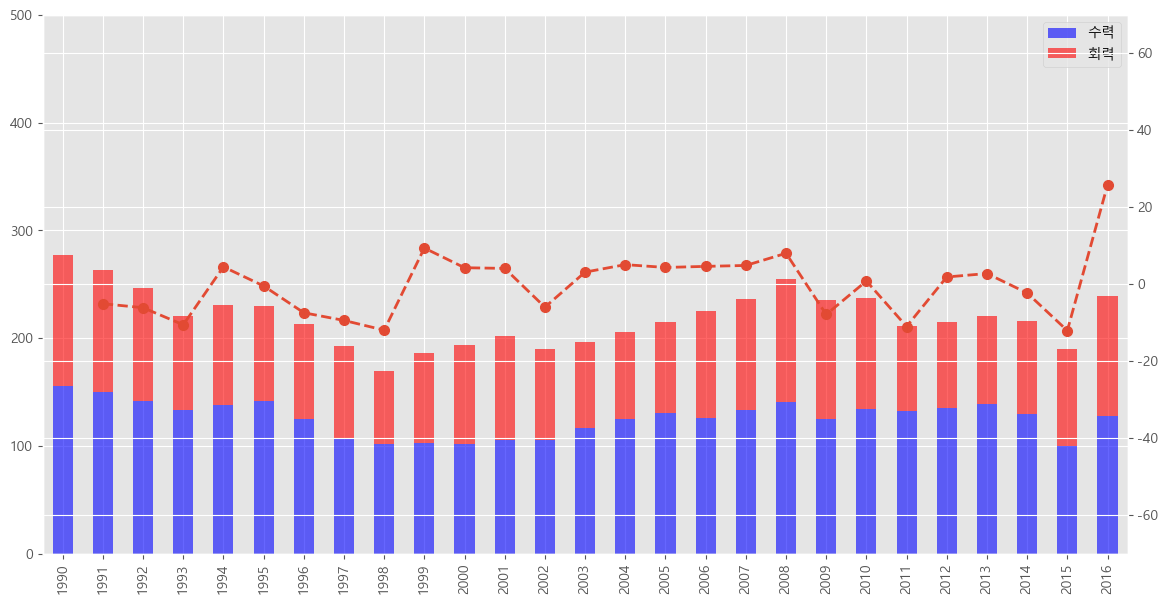

In [29]:
plt.style.use('ggplot')
ax1 = df2_T[['수력', '화력']].plot(kind = 'bar', figsize = (14, 7), stacked = True,
                                   color = ['blue', 'red'], alpha = 0.6)
ax2 = ax1.twinx()
ax2.plot(df2_T.index, df2_T['증감률'],ls='--',marker='o',linewidth=2,markersize = 7)
ax1.set_ylim(0,500)
ax2.set_ylim(-70,70)

<Axes: xlabel='weight', ylabel='mpg'>

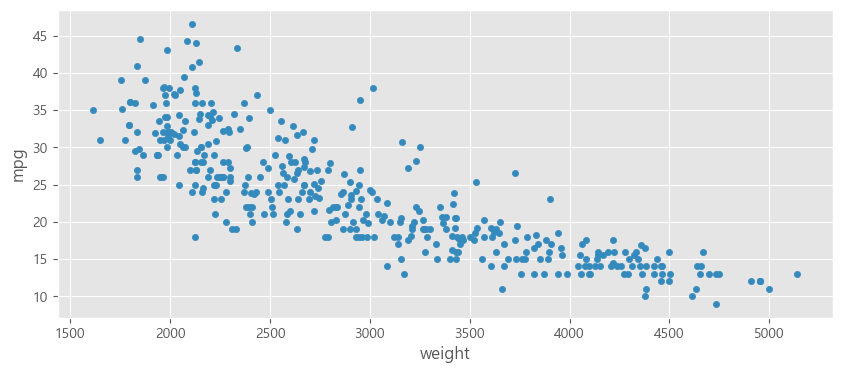

In [31]:
#p139

car = pd.read_csv('csv/auto-mpg.csv')
car.plot(kind = 'scatter', x = 'weight', y = 'mpg', figsize = (10,4)) #pandas 내장 plot 이용
# but 꾸밀려면 matplotlib을 사용하여야 한다. pandas 내장 plot은 간단하게 보기 위한 용도



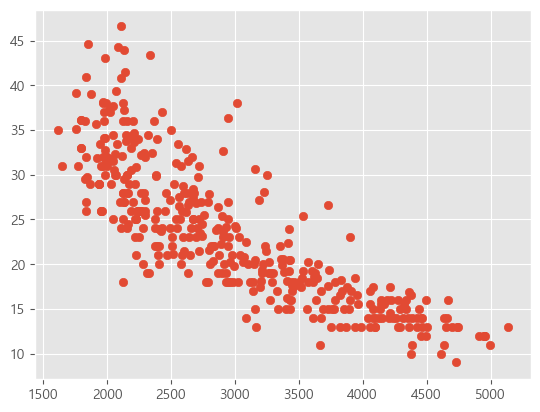

In [33]:
# 또 다른 방법
plt.scatter(x = car['weight'], y = car['mpg'])

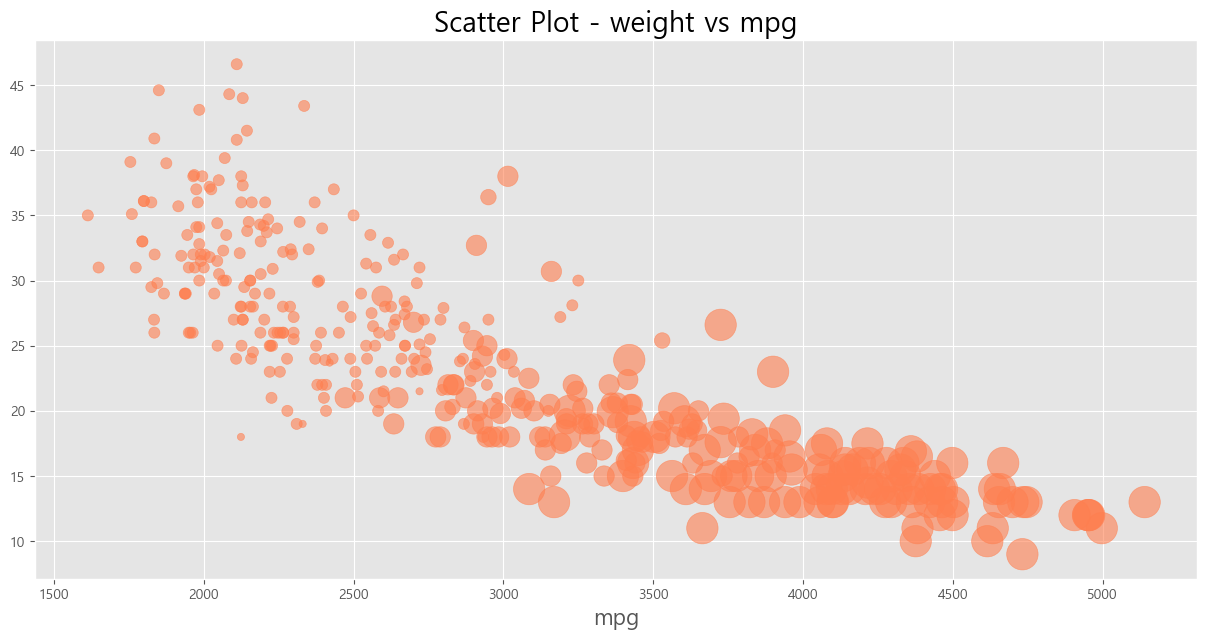

In [58]:
plt.figure(figsize = (15,7))
plt.scatter(x = car['weight'], y = car['mpg'], c = 'coral', s = car['cylinders']**3, alpha = 0.6) # c : color, s : size
plt.xlabel('weight', size = 16)
plt.xlabel('mpg', size = 16)
plt.title('Scatter Plot - weight vs mpg', size = 20)
plt.show()

In [61]:
# 위의 원의 크기에 특정 값을 넣고 싶으면...?
# cylinders는  3,4,6,8 인데,
# 3 : 80, 
# 4 : 
# 6
# 8

cyl_size = (car['cylinders']-1) * 35

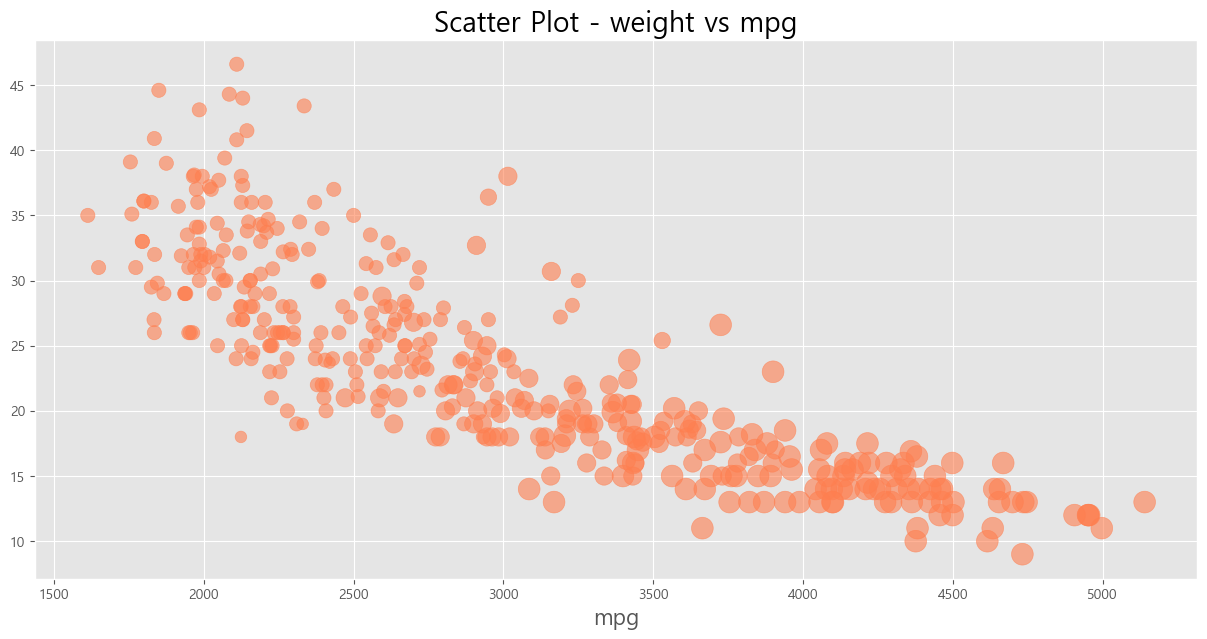

In [62]:
plt.figure(figsize = (15,7))
plt.scatter(x = car['weight'], y = car['mpg'], c = 'coral', s = cyl_size, alpha = 0.6) # c : color, s : size
plt.xlabel('weight', size = 16)
plt.xlabel('mpg', size = 16)
plt.title('Scatter Plot - weight vs mpg', size = 20)
plt.show()

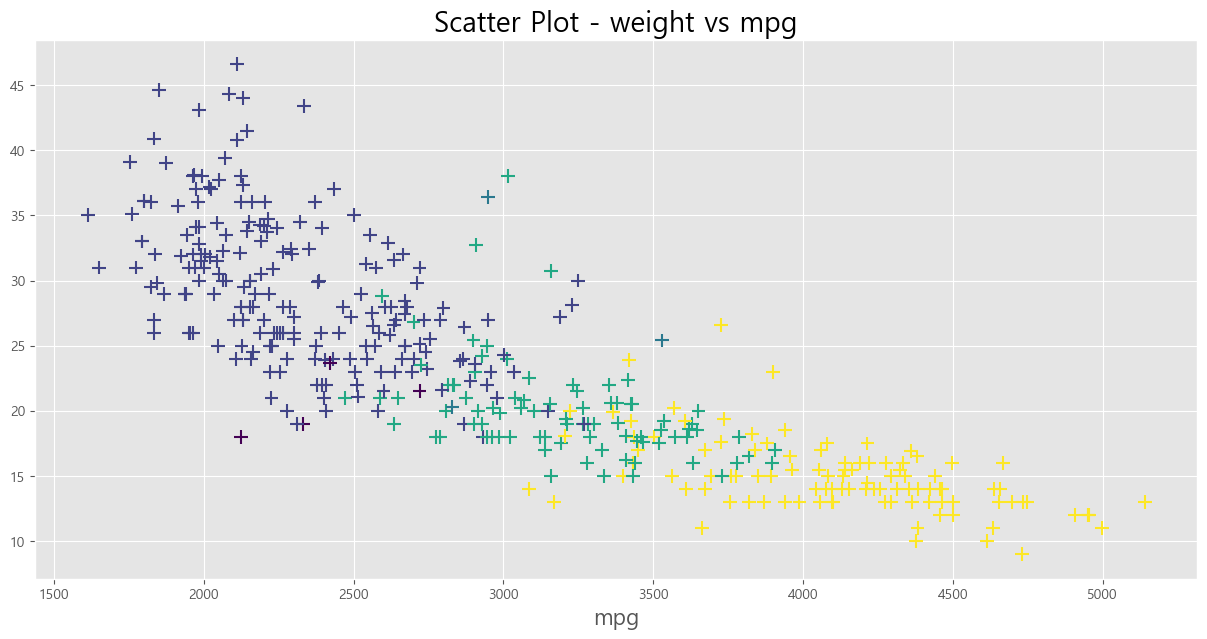

In [66]:
plt.figure(figsize = (15,7))
plt.scatter(x = car['weight'], y = car['mpg'], marker = '+', s = 100,
            cmap = 'viridis', c = cyl_size)


plt.xlabel('weight', size = 16)
plt.xlabel('mpg', size = 16)
plt.title('Scatter Plot - weight vs mpg', size = 20)
plt.show()